# A2 MODELS COMPLEX NETWORKS PROJECT
## Authors : Eric Walwththt - Edison Bejarano

### Implementation of models of complex networks
In the next project we implement some generetors of complex networks for:

- Erdös-Rényi (ER) networks: 
    For this model we going to generate a random network model based on probability "p"
- Barabási & Albert (BA) preferential attachment model

All of these models are configurate to generate sizes of N = 50, 100 and 1000 nodes.


In [1]:
#Libraries
import numpy as np
import matplotlib.pyplot as plt 
import igraph as ig


import time 
from collections import defaultdict
import numpy as np 
from typing import List
import seaborn as sns 
import numpy as np
import networkx as nx
from pylab import rcParams

import plotly.offline as py
import plotly.graph_objects as go


## Parameters configurations

In [2]:
#Parameters
nodes = [50, 100, 1000] 
edges = 1
probability = round(np.random.uniform(0,1),2)

## 1. Erdös-Rényi (ER) networks, either G(N,K) or G(N,p)

### Solution No.1

In [3]:
# Create a adjacency matrix with random values
def ER_model(nodes):
    initial_node = (nodes,nodes)    
    rd = np.random.randint(0,2,initial_node)
    adj = np.matrix(rd)
    np.fill_diagonal(adj,0)
    m2 = np.triu(adj)
    rand_adj = np.matrix(m2)
    g = ig.Graph.Adjacency(rand_adj.astype(bool).tolist())
    #g = ig.Graph.Adjacency(m2.astype(bool).tolist())
    g_degree = g.degree()
    return g, g_degree
grafo, deg_grafo = ER_model(8)

In [4]:
visual_style = {}
# Define colors used for outdegree visualization
colours = ['#fecc5c', '#a31a1c']

# Set bbox and margin
visual_style["bbox"] = (20,20)
visual_style["margin"] = 17

# Set vertex colours
visual_style["vertex_color"] = 'blue'

'''# Set vertex size
visual_style["vertex_size"] = 5
'''
# Set vertex lable size
visual_style["vertex_label_size"] = 8

In [6]:
g1, deg_g1 = ER_model(nodes[0])
g2, deg_g2= ER_model(nodes[1])
g3, deg_g3 = ER_model(nodes[2])
## to networkx for plotting 
g1n = g1.to_networkx()
g2n = g2.to_networkx()
g3n = g3.to_networkx()
## layouts
layout_1 = g1.layout_fruchterman_reingold()
layout_2 = g2.layout(layout="kamada_kawai")
layout_3 = g3.layout_fruchterman_reingold()

In [ ]:
fig, axs = plt.subplots(3, 1, figsize=(14, 18))
fig.suptitle("Erdös-Rényi (ER) networks Graphs")


ig.plot(g1, target=axs[0],layout=layout_1,vertex_size= 20,**visual_style,out_fig_name = "ER_50_nodes.eps")
ig.plot(g2, target=axs[1],layout=layout_2,vertex_size= 10,**visual_style,out_fig_name = "ER_100_nodes.eps")
ig.plot(g3, target=axs[2],layout=layout_3,vertex_size= 5,**visual_style,out_fig_name = "ER_1000_nodes.eps")

In [19]:
!pip3 install -qq "dash[complete]"
import dash

/var/folders/ym/3t052w0s7jqd48knd6xc4bj00000gn/T/ipykernel_9697/204086178.py:20: UserWarning:

Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.

/var/folders/ym/3t052w0s7jqd48knd6xc4bj00000gn/T/ipykernel_9697/204086178.py:20: UserWarning:

Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.

/var/folders/ym/3t052w0s7jqd48knd6xc4bj00000gn/T/ipykernel_9697/204086178.py:20: UserWarning:

Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.



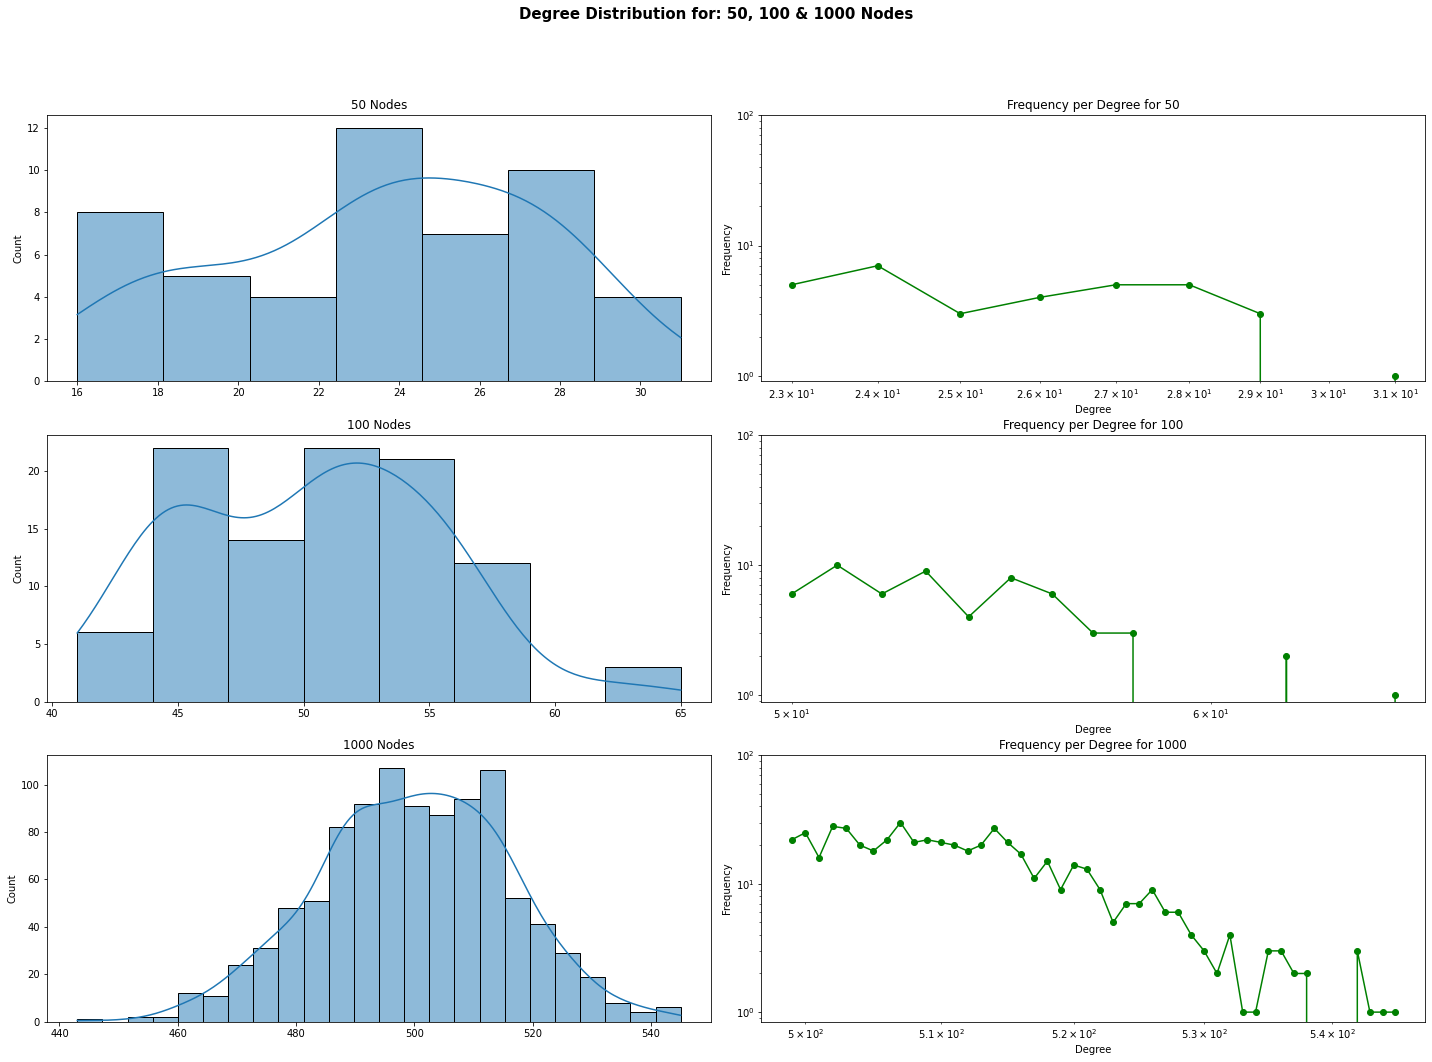

In [11]:
## set the figure size 
FIGURE_SIZE = (20,15)
## create the subplots 
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=FIGURE_SIZE)
#axs = axs.ravel()
## put all the graphs in one list 
gs = [(g1,g1n),(g2,g2n),(g3,g3n)]
## iterate over the above list: (igraph-graph, networkx-graph)
for idx, g in enumerate(gs):
    ## stats for nx-graphs plot 
    dg_hist = nx.degree_histogram(g[1])
    degs = range(len(dg_hist))
    avg_d = int(np.mean(g[0].degree()))
    ## plot the nx-graph
    axs[idx,1].loglog(degs[avg_d:], dg_hist[avg_d:],'go-')
    ## set the labels of the nx-graphs
    axs[idx,1].set_xlabel("Degree")
    axs[idx,1].set_ylabel('Frequency')
    axs[idx,1].set_title(f"Frequency per Degree for {len(g[0].degree())}")
    axs[idx,1].set_ylim([-10,100])
    ## plot the igraph distribution
    graph = sns.histplot(g[0].degree(), kde=True, ax=axs[idx,0])
    axs[idx,0].set_title(f"{len(g[0].degree())} Nodes")
plt.tight_layout()
fig.suptitle("Degree Distribution for: 50, 100 & 1000 Nodes", fontsize=15, fontweight='heavy')
fig.subplots_adjust(top=0.88,)
plt.show()

### Solution No.2

In [ ]:
class ErdosRenyiGraph: 
    tic = time.time()
    """
    Function which implements a random Erdös-Rényi (ER) Graph with the given parameters
    
    PARAMS: 
    -------
    number_of_nodes : the total number of nodes in the graph 
    
    number_of_edges : total number of edges??
    
    degrees : degrees (k)
    
    probabilities : the probability that will be assigned to each new node 
    
    RETRUNS:
    --------
    
    ER_graph : A randomly generated Erdös-Rényi Graph with the defined parameters above. 
    
    """

    ## class for the randomly generated graphs like ER
    def __init__(self, number_of_nodes:int = 5, probabilities:float = 0.2):
        self.nodes = number_of_nodes
        self.probas = probabilities
        self.graph = self._start_network()
        self.edges = self._get_edges()
        self.igraph = igraph.Graph(edges=self.edges)
        self.degrees = self._calculate_degrees()

    
    def _plot_graph(self):


        return igraph.plot(self.igraph) 



    
    def _get_edges(self):
        return [(node, edge) for node in self.graph.keys() for edge in self.graph[node]]

    def _start_network(self):
        g = defaultdict(list)
        ## iterate through the number of nodes 
        for nodes in range(0,self.nodes):
            ## iterate through the possible connections (Node to Node)
            for edges in range(0,self.nodes):
                ## define whether a link exists
                if nodes < edges: 
                    link_exist = np.random.uniform(0,1) > self.probas
                    ## if it exists we append a connection to node_i 
                    if link_exist: 
                        g[nodes].append(edges)
        return g

    def _build_graph(self):
        ## start the network 
        self._start_network()
        print(f"Build the graph with {self.nodes} and {len(self.edges)} edges with a probability of {self.probas} and assigned the iGraph variable")

    ## calculate descriptors 
    # Degrees, Power Law Distribution
    def _calculate_degrees(self):
        return list(map(len,self.graph.values()))

    # theoretical graph
    def _plot_theoretical(self, graph):
        pass 
    # experimental graph 
    def _plot_experimental(self, graph):
        pass

    
    tac = time.time()
    print(f"It took {tac-tic} seconds")


In [ ]:
## Random Seed 
SEED = np.random.seed(42)
## variables 
N = 30
PROBABILITY = round(np.random.uniform(0,1), 2)
## instantiate
graph = ErdosRenyiGraph(N, PROBABILITY)
## call the constructor 
graph._build_graph()
## visualize 
graph._plot_graph()